# Winter 2022 Data Science Intern Challenge 
## Submission By: Samruth Vennapusala

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from numpy import percentile

## Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

## On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

## Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
## What metric would you report for this dataset?

## What is its value?


## Part A: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [4]:
# Import and Print out the data 
test_data_path = r"C:/Users/samru/Desktop/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"
Shop_Data = pd.read_csv(test_data_path)
Shop_Data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [6]:
# Fining the AOV of the order amount
Shop_Data["order_amount"].mean()

3145.128

### As it was stated in the question, the AOV was $3145.13. There was nothing mathematically wrong with the calculation. My first assumption of why this number would be so high is because of outliers. Let’s look more into extreme values of the order amount.

In [18]:
#Lets see all the order amounts in decending order
Shop_Data.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [35]:
# Finding the Unique order amounts in decending order
Order_Amount_Unique_Value=Shop_Data['order_amount'].unique()
Order_Amount_Unique_Value.sort()
Order_Amount_Unique_Value[::-1]

array([704000, 154350, 102900,  77175,  51450,  25725,   1760,   1408,
         1086,   1064,   1056,    980,    965,    960,    948,    935,
          920,    890,    885,    880,    865,    845,    830,    816,
          815,    810,    805,    804,    800,    790,    786,    784,
          780,    774,    772,    765,    760,    748,    745,    740,
          736,    735,    730,    725,    724,    712,    710,    708,
          704,    692,    684,    676,    672,    670,    665,    664,
          660,    656,    655,    652,    650,    648,    645,    644,
          640,    632,    624,    620,    616,    612,    603,    596,
          592,    590,    588,    585,    584,    580,    579,    576,
          570,    568,    561,    560,    552,    544,    543,    536,
          534,    532,    531,    528,    524,    520,    519,    516,
          513,    512,    508,    507,    504,    498,    495,    492,
          489,    488,    486,    483,    480,    474,    472,    470,
      

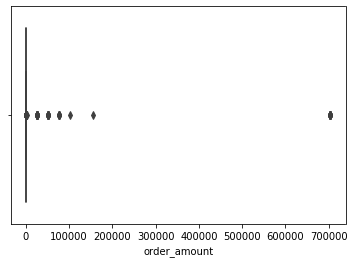

In [13]:
# Used a boxplot to see if we have any outliers
sns.boxplot(x=Shop_Data['order_amount'])

### So we can see that there are outliers in the data and they are manipulating the AOV. The mean is non-resistant. That means, it's affected by outliers. More specifically, the mean will want to move towards the outlier. This is why the AOV is not a good metric to really evaluate this data.

### The question we ask ourselves is do we want to remove the outliers from the data set and then find the AOV with the manipulated Data Set to see what the "Average" transaction looks like?

### This may be a good option but let’s first see if we can find any other good metric to represent this data.


## Part B: What metric would you report for this dataset?

### We could use the median to represent the data as it is not as greatly affect by the presence of outliers as is the mean. However, they may be a better method to get the full picture of the data set.

### Let’s use the five-number summary from the box plot. This includes the median but also other numbers that will give us very good insight on the data.


## Part C: What is its value?

In [38]:
quartiles = percentile(Order_Amount_Unique_Value, [25, 50, 75])
# calculate min/max
data_min, data_max = Order_Amount_Unique_Value.min(), Order_Amount_Unique_Value.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 90.000
Q1: 238.000
Median: 411.000
Q3: 638.000
Max: 704000.000


### So looking at the five-number summary from the box plot, a person can interpret the data pretty well. We can understand the ranges (bottom 25 percentile,25 to 50 percentile, 50 to 75 percentile and 75 to 100 percentiles) of the people shopping. If we use this metric, we don’t have to get rid of the outliers either.

## Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## Part A: How many orders were shipped by Speedy Express in total?

## Query:
    SELECT COUNT(*) FROM [Orders]
    WHERE ShipperID IN (3)
    
    

## Answer:
    68

## Speedy Express shipped 68 orders.

## Part B: What is the last name of the employee with the most orders?

## Query:
    SELECT Employees.LastName,COUNT(Orders.OrderID)
    FROM (Orders INNER JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID) 
    GROUP BY LastName 
    ORDER BY COUNT(Orders.OrderID) DESC 


## Answer:
    Peacock

## The last name of the empolyee with the most sales is Peacock

## Part C: What product was ordered the most by customers in Germany?

## Query:
    SELECT Products.ProductID,ProductName,Country,COUNT(Products.ProductID)
    FROM (Customers INNER JOIN Orders ON Customers.CustomerID = Orders.CustomerID 
                INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
                INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID)
                WHERE Country IN  ("Germany")
    GROUP BY Products.ProductID 

## Answer: 
    Gorgonzola Telino

## The most ordered item from Germany is Gorgonzola Telino.